In [2]:
%matplotlib inline
import pandas as pd

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Kasen chitai,1961
1,Ser,2010
2,Devil Come to Hell and Stay Where You Belong,2008
3,Things You Don't Tell...,2006
4,Regret,2015


In [5]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### What are the ten most common movie names of all time?

In [6]:
t_common = titles
t_common['title'].value_counts().head(10)

Hamlet                  20
Carmen                  16
Macbeth                 15
Maya                    12
The Outsider            12
The Three Musketeers    11
Temptation              11
Othello                 11
Freedom                 11
Vengeance               10
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [102]:
t_1930 = titles[titles['year'] // 10 == 193]
t_1930['year'].value_counts().head(3)

1937    1201
1936    1141
1938    1137
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

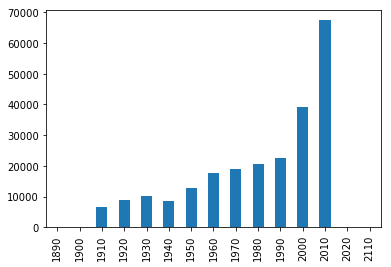

In [103]:
t_decade = titles
(t_decade['year'] // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Hamlet" films made each decade.

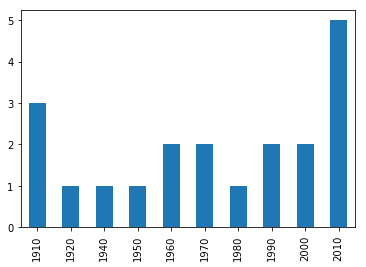

In [104]:
t_ham_dec = titles[titles['title'] == 'Hamlet']
(t_ham_dec['year'] // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Rustler" characters in each decade of the history of film.

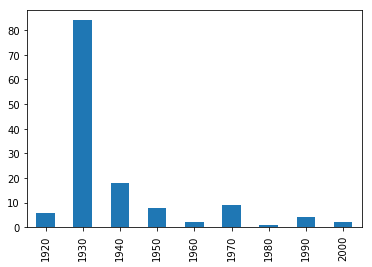

In [105]:
c_rust = cast[cast['character'] == 'Rustler']
(c_rust['year'] // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Hamlet" characters each decade.

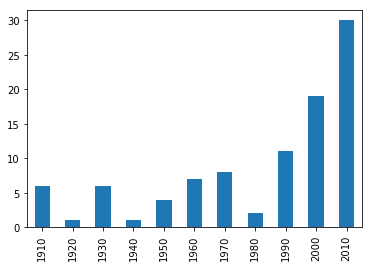

In [106]:
c_rust = cast[cast['character'] == 'Hamlet']
(c_rust['year'] // 10 * 10).value_counts().sort_index().plot(kind='bar')

### What are the 11 most common character names in movie history?

In [107]:
c_common = cast
c_common['character'].value_counts().head(11)

Himself        20457
Dancer         12146
Extra          11271
Reporter        8270
Doctor          7524
Student         7427
Policeman       6950
Party Guest     6888
Nurse           6760
Bartender       6698
Herself         6440
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [110]:
c_her = cast[cast['character'] == 'Herself']
c_her.name.value_counts().head(10)

Queen Elizabeth II    11
Laura (II) M?gica      9
Joyce Brothers         9
Margaret Thatcher      9
Estrella Borja         8
In?s J. Southern       8
Marta Berrocal         8
Mary Jo Pehl           8
Elena Santisteban      7
Hillary Clinton        7
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [112]:
c_her = cast[cast.character == 'Himself']
c_her.name.value_counts().head(10)

Adolf Hitler          100
Richard Nixon          46
Ronald Reagan          41
John F. Kennedy        36
George W. Bush         24
Winston Churchill      23
Ron Jeremy             23
Martin Luther King     22
Benito Mussolini       22
Bill Clinton           22
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [33]:
c_1945 = cast[cast['year'] == 1945]
c_1945['name'].value_counts().head(10)

Emmett Vogan       39
Sam (II) Harris    32
Bess Flowers       29
Harold Miller      29
Nolan Leary        27
Frank O'Connor     27
Franklyn Farnum    26
Larry Steers       25
Tom London         24
Edmund Cobb        24
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [34]:
c_1985 = cast[cast['year'] == 1985]
c_1985['name'].value_counts().head(10)

Mammootty        22
Shakti Kapoor    21
Sukumari         20
Raj Babbar       15
Lou Scheimer     15
Mohanlal         15
Aruna Irani      15
Asrani           13
Deven Verma      13
Om Shivpuri      13
Name: name, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

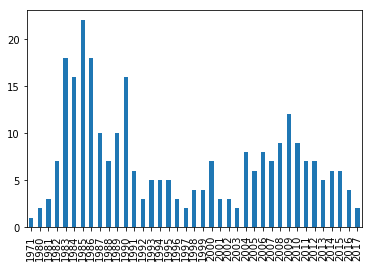

In [18]:
c_mamm = cast[cast['name'] == 'Mammootty']
#c_mamm.sort_values('year').head(10)
c_mamm['year'].value_counts().sort_index().plot(kind='bar')

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [35]:
c_patron = cast[cast.character.str.startswith('Patron in')]
c_patron.character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in the Coffee House       9
Patron in Chinese Restaurant     9
Patron in Billiard Parlor        5
Patron in restaurant             4
Patron in Bar                    4
Patron in cabaret                3
Patron in Restaurant             3
Patron in Club                   3
Patron in Coffee Shop            2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [21]:
c_science = cast[cast.character.str.startswith('Science')]
c_science.character.value_counts().head(10)

Science Teacher         59
Science Student          9
Science Fair Student     9
Science Fair Judge       6
Science Kid              5
Science Club Member      5
Science Reporter         5
Science Promo Cadet      5
Science                  4
Science teacher          3
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

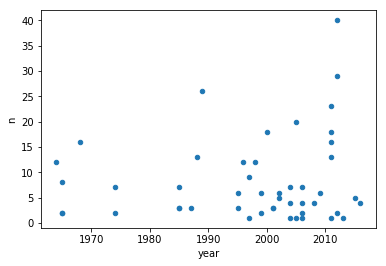

In [44]:
c_judi = cast[cast.name == 'Judi Dench']#.sort_values('year')
c_judi = c_judi[c_judi.n.notnull()]
c_judi.plot(x='year', y='n', kind='scatter')

### Plot the n-values of Cary Grant's roles through his career.

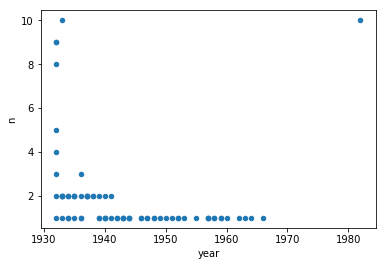

In [43]:
c_cary = cast[(cast.name == 'Cary Grant') & (cast.n.notnull())]#.sort_values('year')
#c_cary = c_judi[c_judi.n.notnull()]
c_cary.plot(x='year', y='n', kind='scatter')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

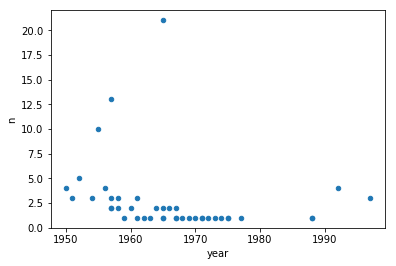

In [46]:
c_sid = cast[(cast.name == 'Sidney Poitier')]# & (cast.n.notnull())]
c_sid.plot(x='year', y='n', kind='scatter')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [47]:
c_1950 = cast[(cast.year // 10 == 195) & (cast.n == 1)]
c_1950.type.value_counts()

actor      6665
actress    2997
Name: type, dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [48]:
c_1950_2 = cast[(cast.year // 10 == 195) & (cast.n == 2)]
c_1950_2.type.value_counts()

actor      4599
actress    4591
Name: type, dtype: int64

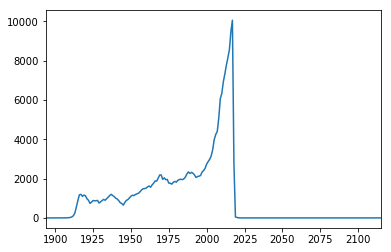

In [24]:
titles['year'].value_counts().sort_index().plot()

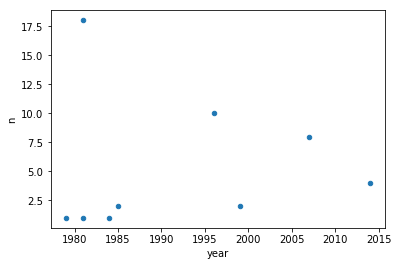

In [34]:
c = cast
c = c[c['character'] == 'Kermit the Frog']
c.plot(x='year', y='n', kind='scatter')

In [29]:
c.head()[['year', 'n']]

,year,n
0,2015,31.0
1,1985,22.0
2,2017,10.0
3,2015,NaN
4,2015,NaN
